Epoch 1/10
7500/7500 [==============================] - 11s 1ms/step - loss: 0.5400 - accuracy: 0.7105 - val_loss: 0.5275 - val_accuracy: 0.7156
Epoch 2/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5328 - accuracy: 0.7144 - val_loss: 0.5245 - val_accuracy: 0.7169
Epoch 3/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5312 - accuracy: 0.7144 - val_loss: 0.5236 - val_accuracy: 0.7175
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5298 - accuracy: 0.7151 - val_loss: 0.5237 - val_accuracy: 0.7173
Epoch 5/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5290 - accuracy: 0.7156 - val_loss: 0.5216 - val_accuracy: 0.7190
Epoch 6/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5283 - accuracy: 0.7160 - val_loss: 0.5218 - val_accuracy: 0.7193
Epoch 7/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.5281 - accuracy: 0.7159 - val_loss: 0.5218 - val_ac

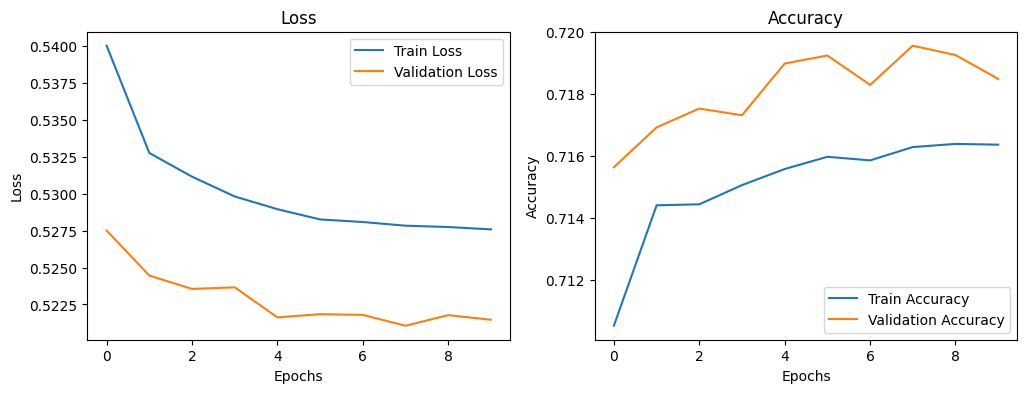

3750/3750 [==============================] - 4s 1ms/step - loss: 0.5215 - accuracy: 0.7185
Test Loss: 0.5214674472808838
Test Accuracy: 0.7184916734695435


In [13]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 파일 로드
normal_data = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Normal/resampled_normal_data_2023_12_7_17_2.csv')
faulty_data = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Fault4/resampled_fault_data_2023_12_15_14_20.csv')

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
faulty_data['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, faulty_data], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor_x', 'motor_y', 'motor_z']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# CNN 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류 출력 레이어

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
#model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# 모델을 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.
Epoch 1/10
18750/18750 [==============================] - 30s 2ms/step - loss: 1.4611 - accuracy: 0.3403 - val_loss: 1.4516 - val_accuracy: 0.3466
Epoch 2/10
18750/18750 [==============================] - 28s 2ms/step - loss: 1.4531 - accuracy: 0.3452 - val_loss: 1.4491 - val_accuracy: 0.3465
Epoch 3/10
18750/18750 [==============================] - 28s 2ms/step - loss: 1.4517 - accuracy: 0.3456 - val_loss: 1.4481 - val_accuracy: 0.3477
Epoch 4/10
18750/18750 [==============================] - 30s 2ms/step - loss: 1.4508 - accuracy: 0.3463 - val_loss: 1.4470 - val_accuracy: 0.3481
Epoch 5/10
18750/18750 [==============================] - 29s 2ms/step - loss: 1.4504 - accuracy: 0.3469 - val_loss: 1.4472 - val_accuracy: 0.3485
Epoch 6/10
18750/18750 [==============================] - 29s 2ms/step - loss: 1.4497 - accuracy: 0.3470 - val_loss: 1.4467 - val_accuracy: 0.3488
Epoch 7/10
18750/18750 [==============================] - 29s 2ms/step - loss: 1.4

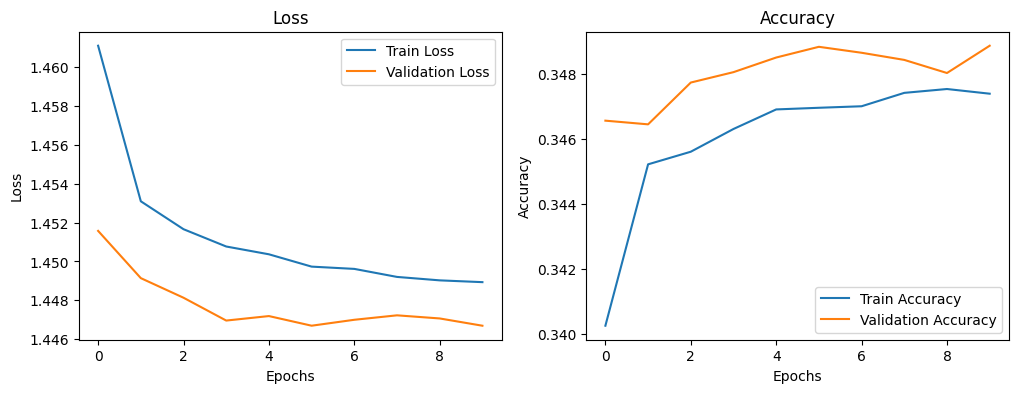

9375/9375 [==============================] - 10s 1ms/step - loss: 1.4467 - accuracy: 0.3489
Test Loss: 1.4466888904571533
Test Accuracy: 0.34887000918388367


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

# GPU 설정
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) == 0:
    print("GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.")
else:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 데이터 파일 로드
# 각 고장 유형에 대한 데이터가 다른 폴더에 위치하는 경우를 가정
# 각 폴더에서 데이터를 로드하고 레이블을 할당한 후 데이터 결합

# 정상 데이터에 레이블 0(정상) 할당
normal_data = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Normal/resampled_normal_data_2023_12_7_17_2.csv')
normal_data['label'] = 'normal'

# 각 고장 유형에 대한 데이터를 로드하고 해당 레이블 할당
faulty_data1 = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Fault1/resampled_fault_data_2023_12_14_13_54.csv')
faulty_data1['label'] = 'faulty_type_1'

faulty_data2 = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Fault2/resampled_fault_data_2023_12_14_15_2.csv')
faulty_data2['label'] = 'faulty_type_2'

faulty_data3 = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Fault3/resampled_fault_data_2023_12_15_13_5.csv')
faulty_data3['label'] = 'faulty_type_3'

faulty_data4 = pd.read_csv('C:/Users/7-2009-1186-16/Desktop/-sampling-frequency-hz-/vibration_data/re_condition1/300rpm(diff)/Fault4/resampled_fault_data_2023_12_15_14_11.csv')
faulty_data4['label'] = 'faulty_type_4'

# 데이터 결합
combined_data = pd.concat([normal_data, faulty_data1, faulty_data2, faulty_data3, faulty_data4], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor_x', 'motor_y', 'motor_z']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 레이블 인코딩
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
y = np_utils.to_categorical(y)  # 원-핫 인코딩

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # 다중 클래스 분류

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [17]:
import tensorflow as tf
print("Available GPUs:", len(tf.config.experimental.list_physical_devices('GPU')))


Available GPUs: 0
